In [1]:
import pandas as pd
import random
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import numpy as np
import datetime
import calendar as cd
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
twitter= pd.read_csv("./datasets/twitter.csv")
twitter['Hashtags'] = twitter.Hashtags.str.lower()
twitter.drop_duplicates(inplace=True)
twitter.reset_index(drop=True,inplace=True)

In [3]:
twitter.describe()

,Regions,Date,Hashtags
count,159174,159174,159022
unique,64,52,11455
top,Tallahassee,2016-11-16,#wednesdaywisdom
freq,2551,3200,2237


In [4]:
regions = pd.DataFrame({'Regions':pd.unique(twitter.Regions)})
regions=regions[regions.Regions!='United States']
regions_2 = random.sample(list(regions.Regions),2)
print("Regions:",regions_2)

Regions: ['San Antonio', 'Virginia Beach']


San Antonio
           Hashtags  freq
0  #wednesdaywisdom    38
1         #1linewed    25
2      #expediachat    21
3     #selfieforseb    19
4       #adweekchat    16
5       #bufferchat    14
6             #ncbd    11
7         #chatsnap    11
8        #stylechat     9
9       #sproutchat     6


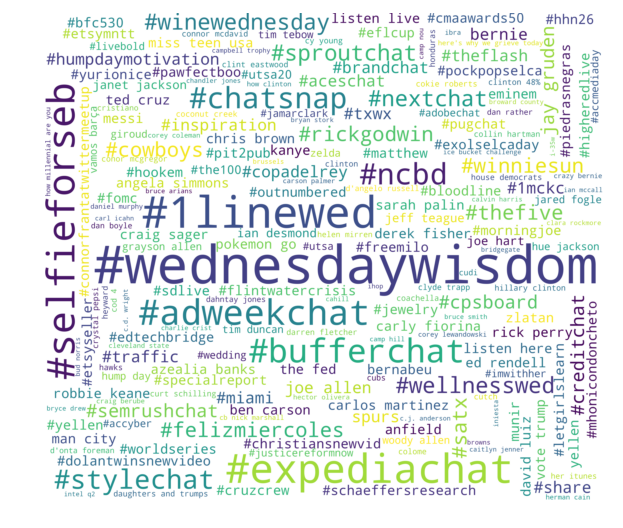

Virginia Beach
           Hashtags  freq
0  #wednesdaywisdom    36
1         #1linewed    27
2      #expediachat    23
3       #adweekchat    19
4       #bufferchat    17
5     #selfieforseb    16
6             #ncbd    11
7         #chatsnap    10
8      #semrushchat     9
9       #sproutchat     9


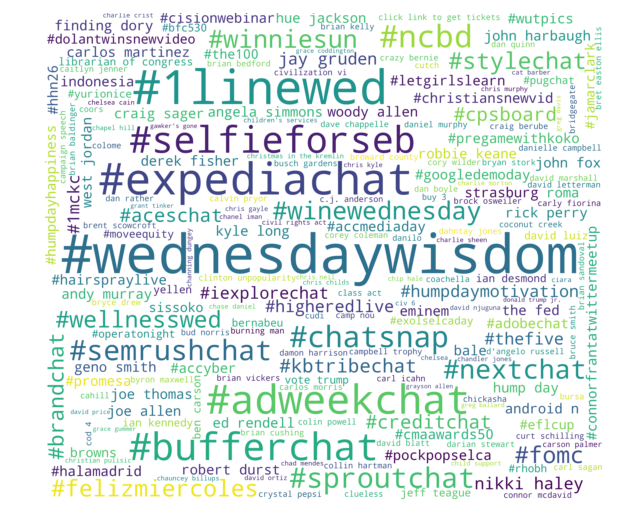

In [5]:
#Wordcloud of HashTags for a particular region
for reg in regions_2:
    reg_data = twitter[twitter['Regions']==reg]
    print(reg)
    grp_tags = pd.DataFrame({'freq' : reg_data.groupby(['Hashtags']).size()}).sort_values(by=['freq'],ascending=False).reset_index()
    top_50_tags=grp_tags.head(50)
    #top_10_tags['Hashtags']=pd.DataFrame(tag_list)
    print(top_50_tags.head(10))
    d = {}
    for tag, freq in grp_tags.values:
        d[tag] = freq
    wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=4000,
                          height=3500
                         )
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    print("===========")


In [6]:
grp_data= pd.DataFrame({'freq' : twitter.groupby(['Date','Hashtags']).size()}).sort_values(by=['Date'],ascending=True).reset_index()
grp_entire_data= pd.DataFrame({'freq' : twitter.groupby(['Regions','Date','Hashtags']).size()}).sort_values(by=['Date'],ascending=True).reset_index()

unique_tags = list(pd.unique(grp_data.Hashtags))
rndm5_tags=[]
while True:
    tag = random.sample(unique_tags,1)[0]
    x=grp_data[grp_data['Hashtags']==tag]
    
    if len(rndm5_tags)==5:
        break
    if(len(x)<30):
        continue
    elif (tag not in rndm5_tags):
            rndm5_tags.append(tag)
           
print("Hashtags: ",rndm5_tags)

month_wise_count=[]
for tag,k in zip(rndm5_tags,range(1,6)):
    x=grp_entire_data[grp_entire_data['Hashtags']==tag]
    for i in x.Date:
        date=datetime.datetime.strptime(i, "%Y-%m-%d")
        month=cd.month_name[date.month]
        x.loc[x.Date==i,'Date'] = month
    x.rename(columns={'Date':'Month'},inplace=True)
    month_wise_count.append(x)


Hashtags:  ['#ncbd', '#1linewed', '#bufferchat', '#semrushchat', '#adweekchat']


#ncbd
        Month  freq
0     January    42
1    February    30
2       March    46
3       April    29
4         May    14
5        June    61
6        July    48
7      August    58
8   September    20
9     October    11
10   November    55
11   December    64
#1linewed
        Month  freq
0     January    63
1    February    37
2       March    64
3       April    54
4         May    64
5        June    64
6        July    64
7      August    64
8   September    64
9     October    64
10   November    64
11   December    64
#bufferchat
        Month  freq
0     January    63
1    February    12
2       March    64
3       April    61
4         May    56
5        June    58
6        July    48
7      August    64
8   September    63
9     October    61
10   November    63
11   December    60
#semrushchat
        Month  freq
0     January    63
1    February    17
2       March    13
3       April    22
4         May     8
5        June     6
6        July     5
7      August    57

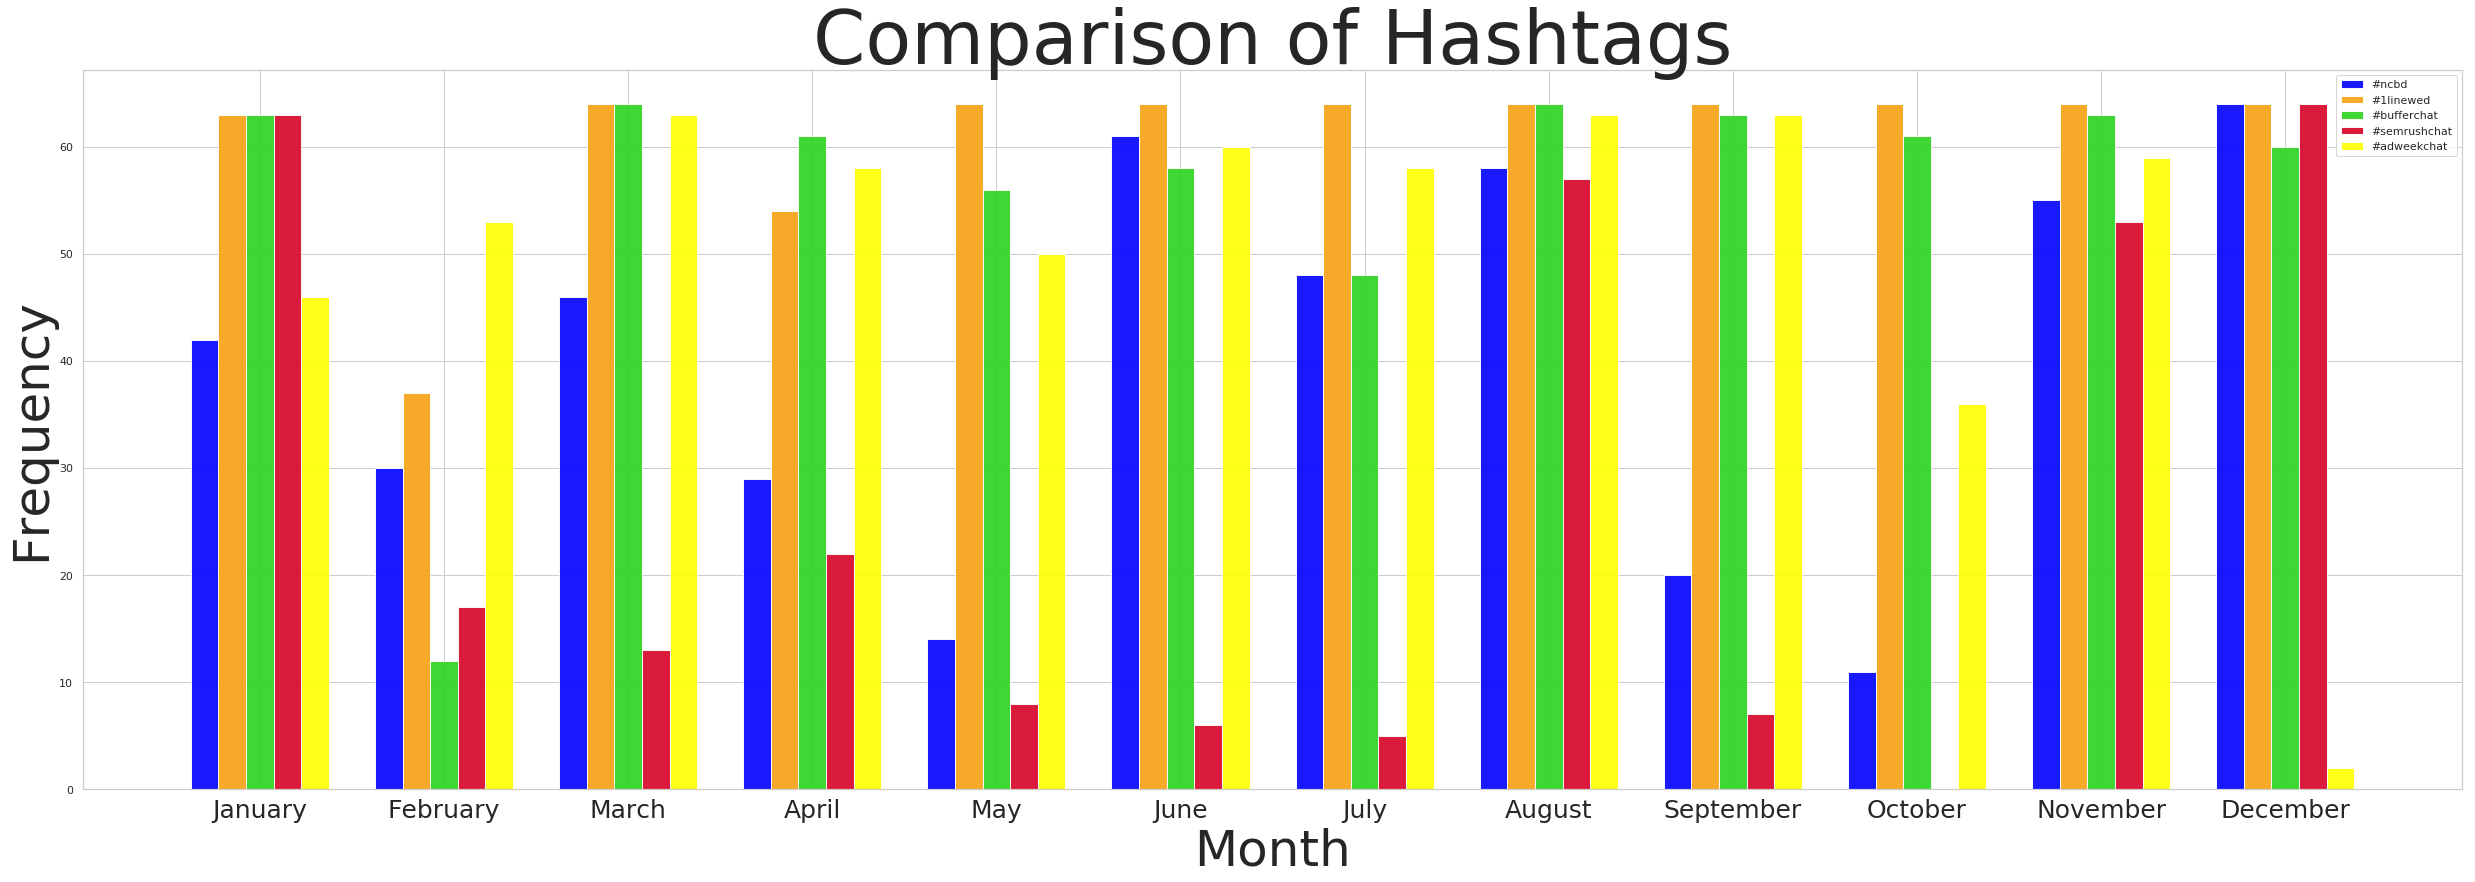

In [7]:
#Bar plot of hashtags
month_wise_cnt=[]
for df in month_wise_count:
    df.drop_duplicates(inplace=True)
    month_wise_cnt.append(pd.DataFrame(df.groupby(['Month'],sort=False)['freq'].sum()).reset_index())

months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in months:
     for j in range(len(month_wise_cnt)):
            if i not in list(month_wise_cnt[j].Month):
                ind = months.index(i)
                line = pd.DataFrame({"Month": i, "freq": 0}, index=[ind])
                month_wise_cnt[j] = pd.concat([month_wise_cnt[j].iloc[:ind], line, month_wise_cnt[j].iloc[ind:]]).reset_index(drop=True)

for tag,m in zip(rndm5_tags,month_wise_cnt):
    print(tag)
    print(m)
    print('===========')

y_pos = np.arange(len(month_wise_cnt[0].Month))
plt.figure(figsize = (145,45))
plt.subplot(3,3,5)
w = 0.15
plt.bar(y_pos-0.3,month_wise_cnt[0].freq, align='center',color='blue', alpha=0.9,width = w,label=rndm5_tags[0])
plt.bar(y_pos-0.15,month_wise_cnt[1].freq, align='center',color='#f7a013', alpha=0.9,width = w,label=rndm5_tags[1])
plt.bar(y_pos,month_wise_cnt[2].freq, align='center',color='#29d31d', alpha=0.9,width = w,label=rndm5_tags[2])
plt.bar(y_pos+0.15,month_wise_cnt[3].freq, align='center',color='#d80225', alpha=0.9,width = w,label=rndm5_tags[3])
plt.bar(y_pos+0.3,month_wise_cnt[4].freq, align='center',color='yellow', alpha=0.9,width = w,label=rndm5_tags[4])
plt.xticks(y_pos,month_wise_cnt[0].Month,fontsize=25)
plt.xlabel("Month",fontsize=50)
plt.ylabel('Frequency',fontsize=50)
plt.title("Comparison of Hashtags",fontsize=75)
plt.legend(loc=1)
plt.show()
